In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

## Loading Data

In [30]:
concrete=pd.read_excel("Concrete_Data.xls")

In [31]:
concrete.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


## Renaming all features

In [32]:
concrete.columns=["cement","blastFurnace","flyAsh","water","superplasticizer","coarseAggregate","fineAggregate","age","strength"]

In [33]:
concrete.head()

,cement,blastFurnace,flyAsh,water,superplasticizer,coarseAggregate,fineAggregate,age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


## Ask Six Questions

In [34]:
concrete.shape

(1030, 9)

In [35]:
concrete.isnull().sum()

,0
cement,0
blastFurnace,0
flyAsh,0
water,0
superplasticizer,0
coarseAggregate,0
fineAggregate,0
age,0
strength,0


In [36]:
concrete.duplicated().sum()

np.int64(25)

In [37]:
concrete.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cement            1030 non-null   float64
 1   blastFurnace      1030 non-null   float64
 2   flyAsh            1030 non-null   float64
 3   water             1030 non-null   float64
 4   superplasticizer  1030 non-null   float64
 5   coarseAggregate   1030 non-null   float64
 6   fineAggregate     1030 non-null   float64
 7   age               1030 non-null   int64  
 8   strength          1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.6 KB


In [38]:
concrete.describe()

,cement,blastFurnace,flyAsh,water,superplasticizer,coarseAggregate,fineAggregate,age,strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.165631,73.895485,54.187136,181.566359,6.203112,972.918592,773.578883,45.662136,35.817836
std,104.507142,86.279104,63.996469,21.355567,5.973492,77.753818,80.175427,63.169912,16.705679
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.707115
50%,272.900000,22.000000,0.000000,185.000000,6.350000,968.000000,779.510000,28.000000,34.442774
75%,350.000000,142.950000,118.270000,192.000000,10.160000,1029.400000,824.000000,56.000000,46.136287
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


## EDA

In [39]:
corr=concrete.corr()
corr

,cement,blastFurnace,flyAsh,water,superplasticizer,coarseAggregate,fineAggregate,age,strength
cement,1.000000,-0.275193,-0.397475,-0.081544,0.092771,-0.109356,-0.222720,0.081947,0.497833
blastFurnace,-0.275193,1.000000,-0.323569,0.107286,0.043376,-0.283998,-0.281593,-0.044246,0.134824
flyAsh,-0.397475,-0.323569,1.000000,-0.257044,0.377340,-0.009977,0.079076,-0.154370,-0.105753
water,-0.081544,0.107286,-0.257044,1.000000,-0.657464,-0.182312,-0.450635,0.277604,-0.289613
superplasticizer,0.092771,0.043376,0.377340,-0.657464,1.000000,-0.266303,0.222501,-0.192717,0.366102
coarseAggregate,-0.109356,-0.283998,-0.009977,-0.182312,-0.266303,1.000000,-0.178506,-0.003016,-0.164928
fineAggregate,-0.222720,-0.281593,0.079076,-0.450635,0.222501,-0.178506,1.000000,-0.156094,-0.167249
age,0.081947,-0.044246,-0.154370,0.277604,-0.192717,-0.003016,-0.156094,1.000000,0.328877
strength,0.497833,0.134824,-0.105753,-0.289613,0.366102,-0.164928,-0.167249,0.328877,1.000000


<Axes: >

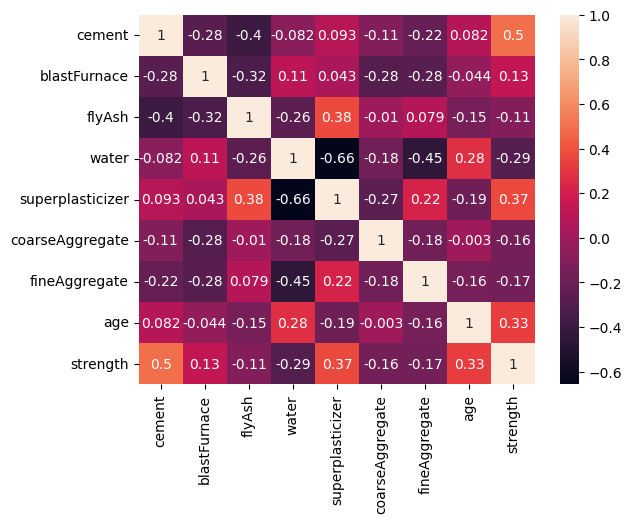

In [40]:
sns.heatmap(corr,annot=True)

## Train test split

In [41]:
X=concrete.drop("strength",axis=1)
y=concrete["strength"]

In [42]:
X.shape

(1030, 8)

In [43]:
y.shape

(1030,)

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

## Plotting the distribution without any transformation

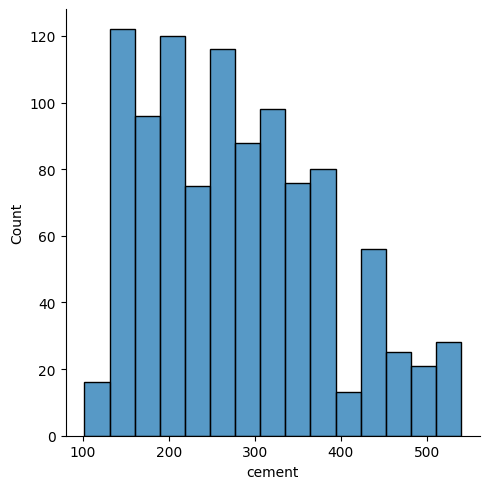

In [46]:
sns.displot(concrete["cement"])

/tmp/ipython-input-47-344321515.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(concrete["cement"])


<Axes: xlabel='cement', ylabel='Density'>

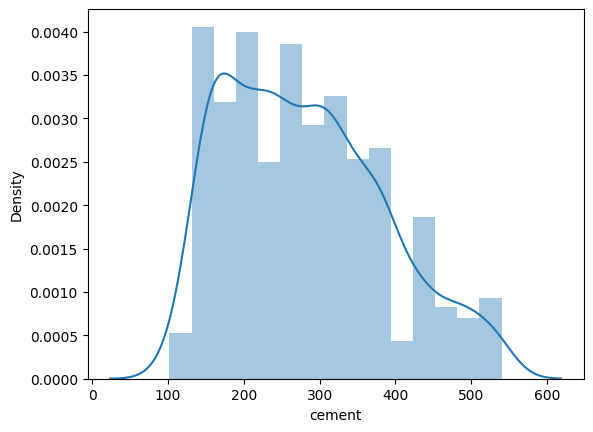

In [47]:
sns.distplot(concrete["cement"])

/tmp/ipython-input-48-2628867781.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])


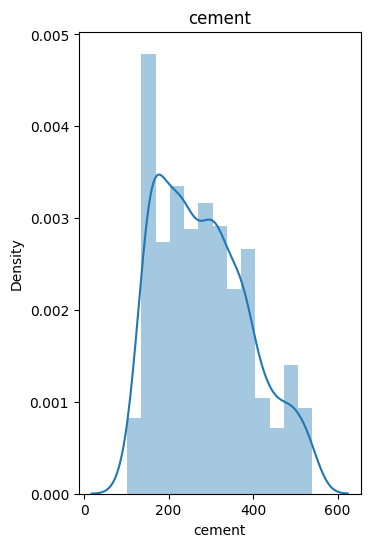

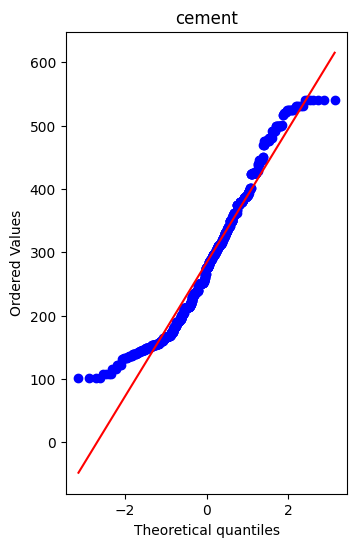

/tmp/ipython-input-48-2628867781.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])


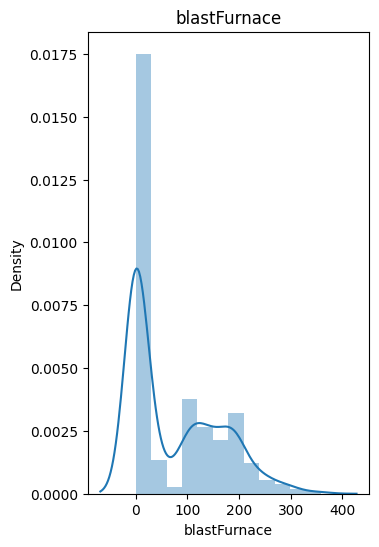

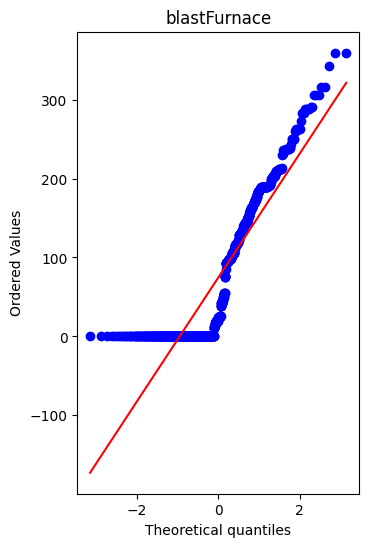

/tmp/ipython-input-48-2628867781.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])


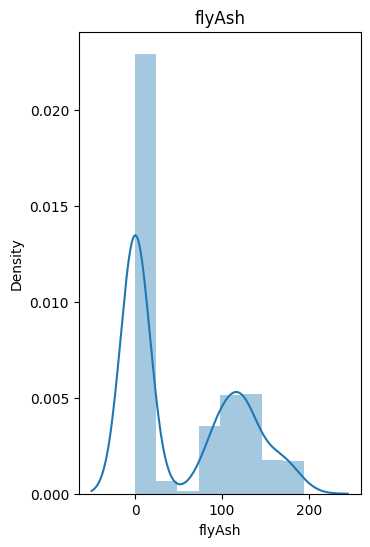

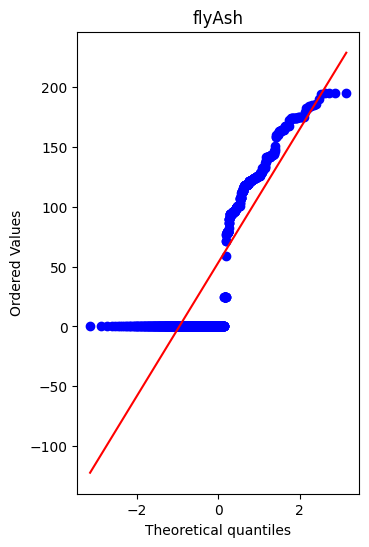

/tmp/ipython-input-48-2628867781.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])


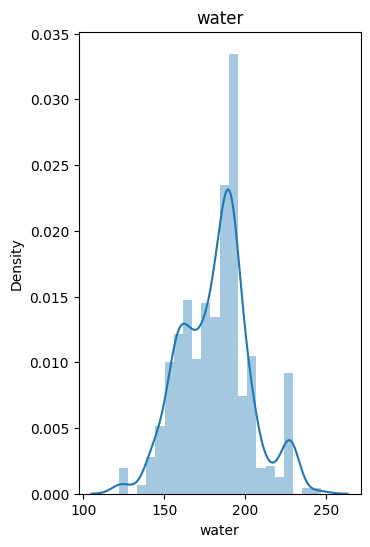

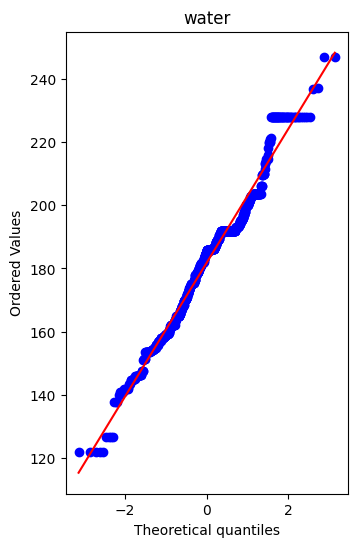

/tmp/ipython-input-48-2628867781.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])


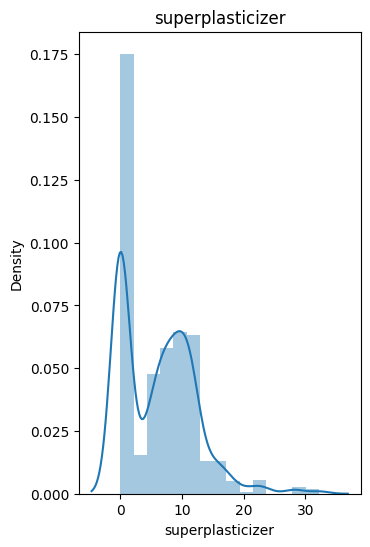

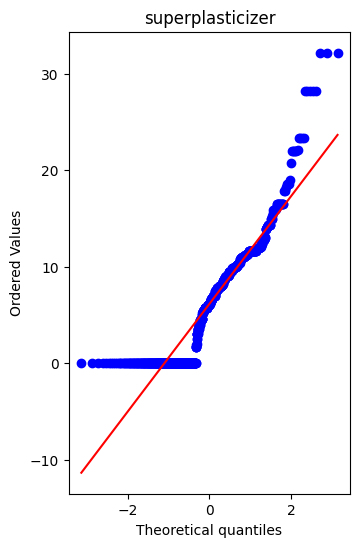

/tmp/ipython-input-48-2628867781.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])


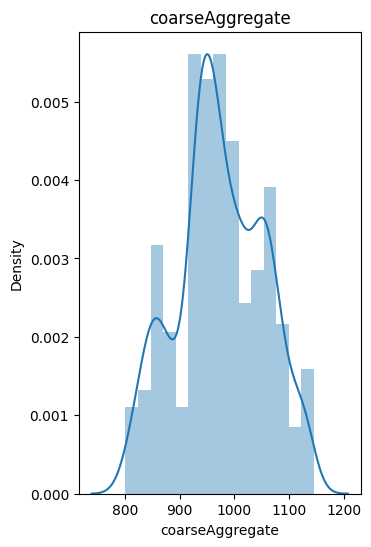

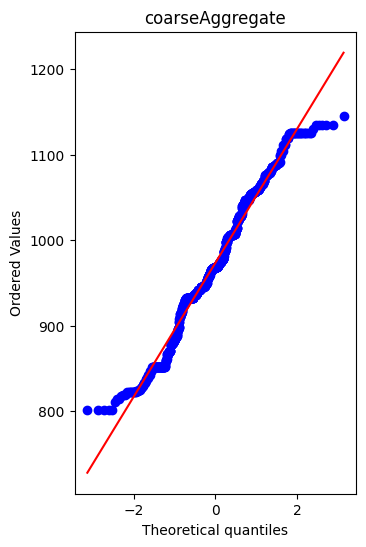

/tmp/ipython-input-48-2628867781.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])


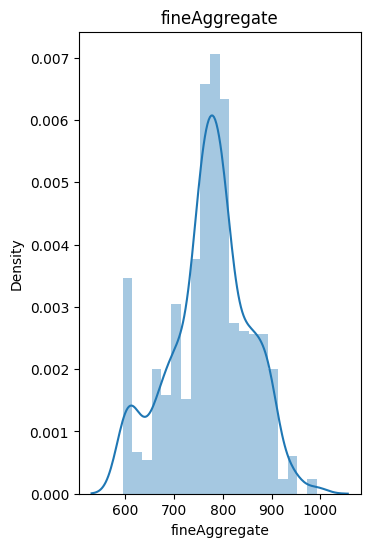

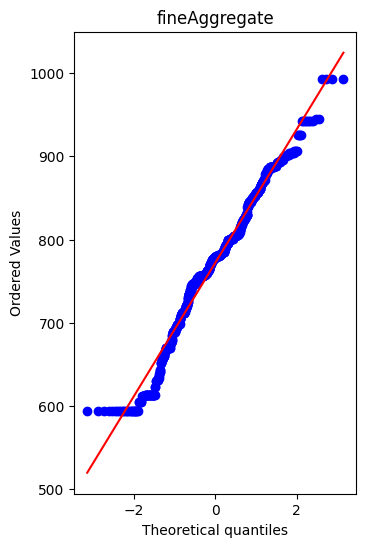

/tmp/ipython-input-48-2628867781.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])


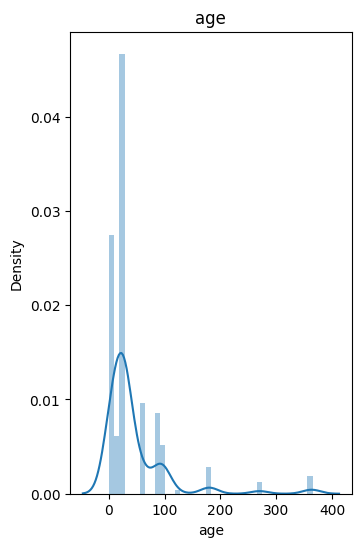

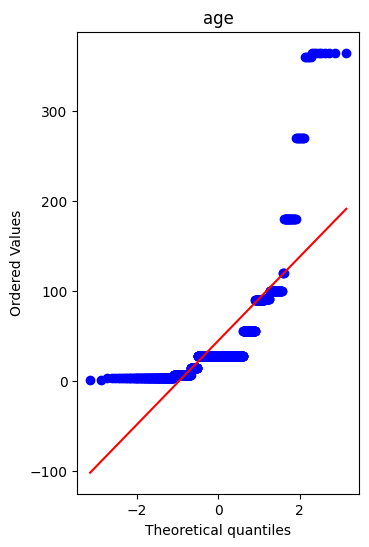

In [48]:
for col in X_train.columns:
    plt.figure(figsize=(8,6))
    plt.subplot(1,2,1)
    sns.distplot(X_train[col])
    plt.title(col)
    plt.show()


    plt.figure(figsize=(8,6))
    plt.subplot(1,2,2)
    stats.probplot(X_train[col],dist="norm",plot=plt)
    plt.title(col)
    plt.show()


## Apply power transformer

In [49]:
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer()

In [50]:
X_train_transformed=pt.fit_transform(X_train)
X_test_transformed=pt.fit_transform(X_test)

/tmp/ipython-input-51-892459239.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])


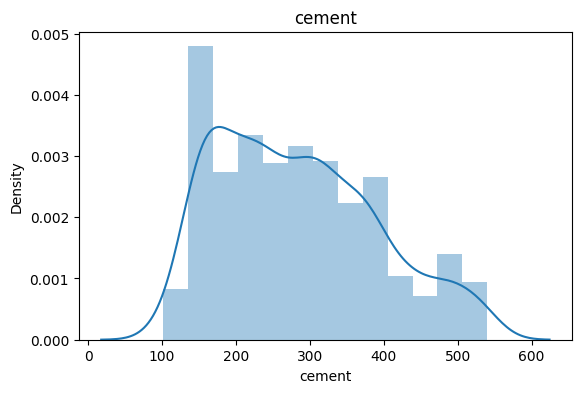

/tmp/ipython-input-51-892459239.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_transformed[col])


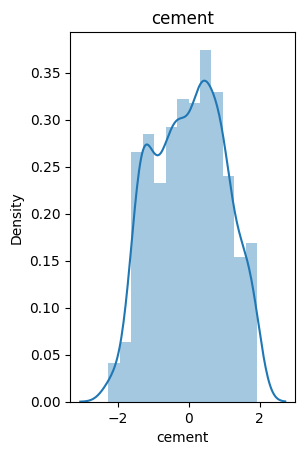

/tmp/ipython-input-51-892459239.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])


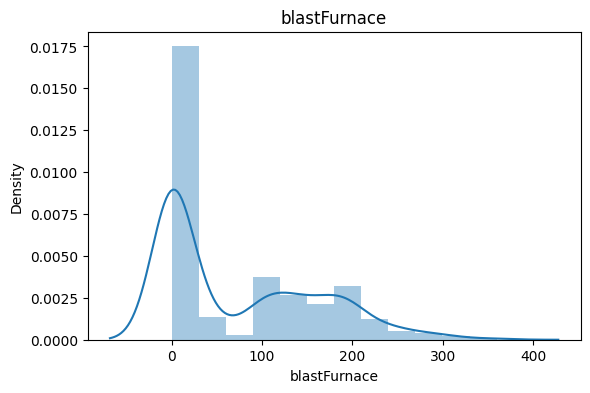

/tmp/ipython-input-51-892459239.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_transformed[col])


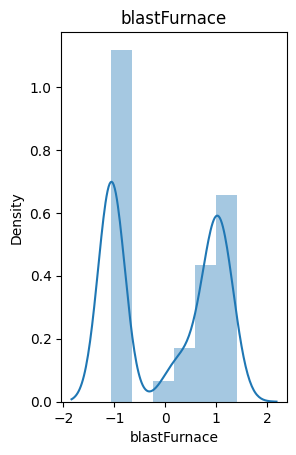

/tmp/ipython-input-51-892459239.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])


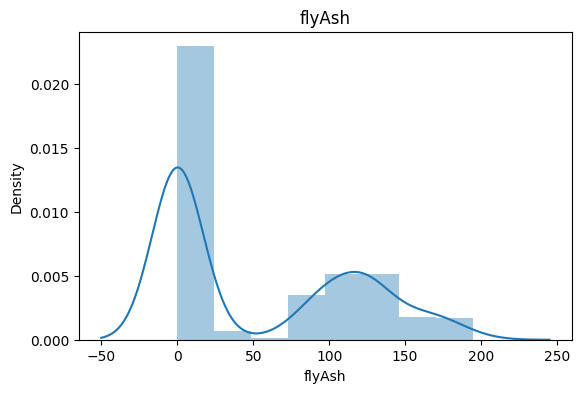

/tmp/ipython-input-51-892459239.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_transformed[col])


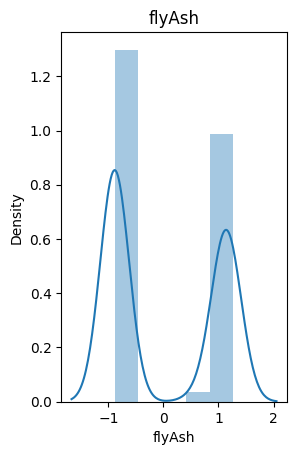

/tmp/ipython-input-51-892459239.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])


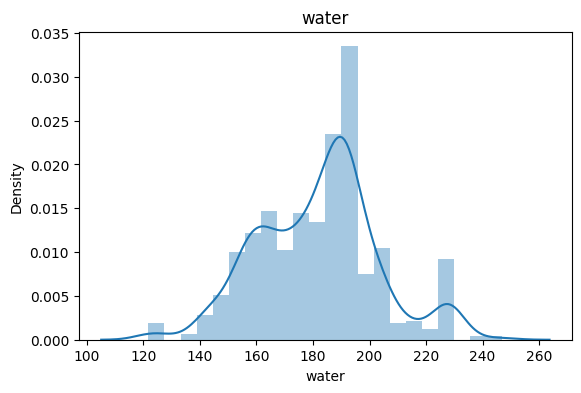

/tmp/ipython-input-51-892459239.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_transformed[col])


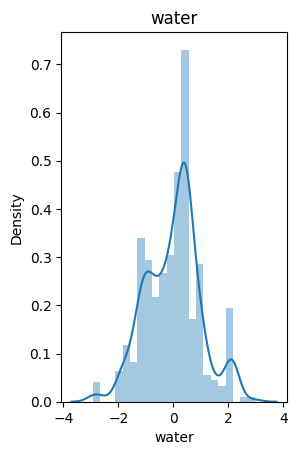

/tmp/ipython-input-51-892459239.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])


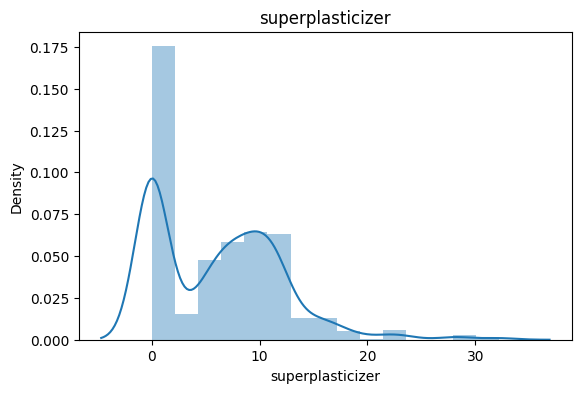

/tmp/ipython-input-51-892459239.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_transformed[col])


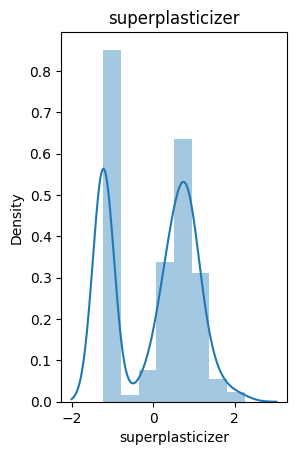

/tmp/ipython-input-51-892459239.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])


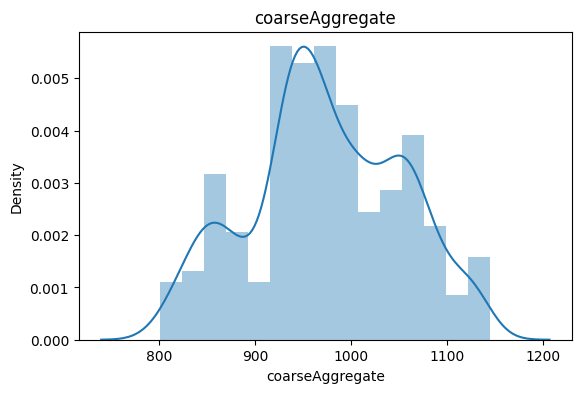

/tmp/ipython-input-51-892459239.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_transformed[col])


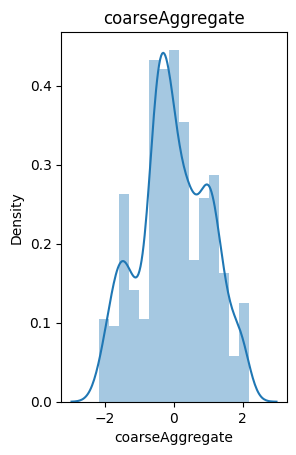

/tmp/ipython-input-51-892459239.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])


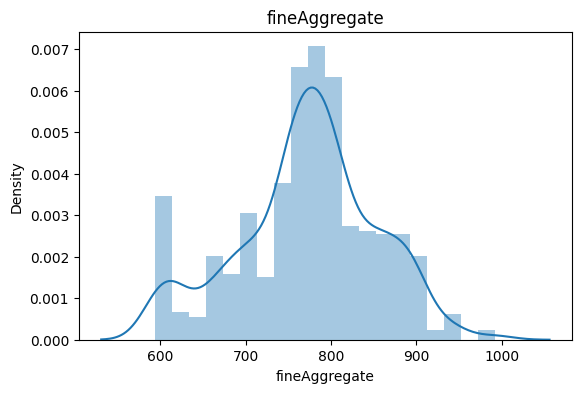

/tmp/ipython-input-51-892459239.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_transformed[col])


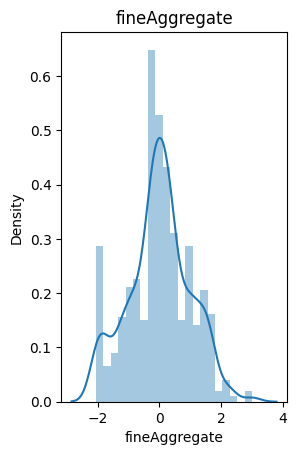

/tmp/ipython-input-51-892459239.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])


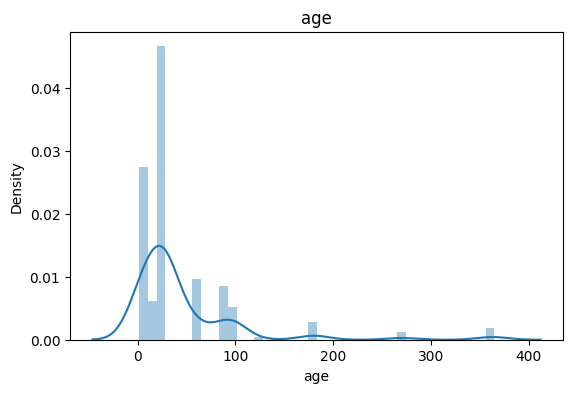

/tmp/ipython-input-51-892459239.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_transformed[col])


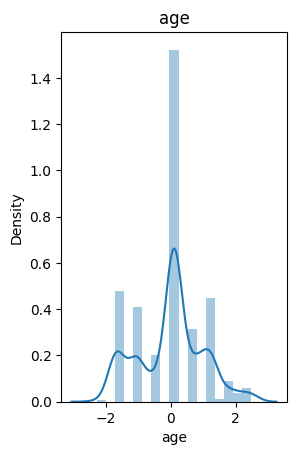

In [51]:
X_train_transformed=pd.DataFrame(X_train_transformed,columns=X_train.columns)
for col in X_train_transformed.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.distplot(X_train[col])
    plt.title(col)
    plt.show()



    plt.subplot(122)
    sns.distplot(X_train_transformed[col])
    plt.title(col)
    plt.show()


## Scaling Standard Scaler

In [52]:
from sklearn.preprocessing import StandardScaler
scalr=StandardScaler()

In [53]:
X_train_transformed=scalr.fit_transform(X_train_transformed)
X_test_transformed=scalr.transform(X_test_transformed)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [54]:
X_train_transformed

array([[-1.27972171,  1.01817459,  1.13100159, ..., -0.26249622,
        -0.67754738,  0.10577763],
       [ 1.24481896,  0.22256194,  1.16667886, ..., -1.91272337,
        -0.31403933,  0.10577763],
       [ 0.07950589, -1.05700975,  1.14353097, ...,  1.01841286,
         0.02598101, -1.664976  ],
       ...,
       [-0.84411355, -1.05700975,  1.15211601, ...,  1.34537397,
         0.29718076,  1.25751143],
       [ 1.56573286,  0.92179935, -0.88493157, ..., -1.53725058,
         0.07623473,  0.10577763],
       [ 0.42656572, -1.05700975,  1.12368097, ..., -0.62083037,
         0.09513185,  0.10577763]])

## Training model

In [56]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

from sklearn.metrics import mean_squared_error,r2_score

In [57]:
models={
    "lr":LinearRegression(),
    "lss":Lasso(),
    "Ridg":Ridge(),
    "dtr":DecisionTreeRegressor(),
    "xgb":XGBRegressor()
}

for name,md in models.items():
  md.fit(X_train_transformed,y_train)
  y_pred=md.predict(X_test_transformed)

  print(f"{name} : mse {mean_squared_error(y_test,y_pred)},r2 score: {r2_score(y_test,y_pred)}")

lr : mse 47.572380131872585,r2 score: 0.8153827256637696
lss : mse 53.25581246985716,r2 score: 0.7933266548049116
Ridg : mse 47.57281239993334,r2 score: 0.8153810481325857
dtr : mse 65.32729120319608,r2 score: 0.7464800708253205
xgb : mse 47.743378588086735,r2 score: 0.8147191206725026


## selecting best model

In [59]:
xgb=XGBRegressor()
xgb.fit(X_train_transformed,y_train)
y_pred=xgb.predict(X_test_transformed)

r2_score(y_test,y_pred)

0.8147191206725026

## Predict Model

In [63]:
def pred_strength(cem,blastf,flyas,water,superplaster,courseagg,fineagg,age):
    features= np.array([[cem,blastf,flyas,water,superplaster,courseagg,fineagg,age]])
    pred=xgb.predict(features).reshape(1,-1)[0]
    return pred[0]

In [64]:
cem=158.60
blastf=148.90
flyas=116.00
water=175.10
superplaster=15.00
courseagg=953.3
fineagg=719.70
age=28

strength=pred_strength(cem,blastf,flyas,water,superplaster,courseagg,fineagg,age)

In [65]:
print(strength)

56.05373


In [62]:
import pickle
pickle.dump(xgb,open("model.pkl","wb"))